<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Updated: 2019/11/13

#### Load the ferret extension

In [1]:
%load_ext ferretmagic

#### Get data from ferret and put data from python

In [2]:
%%ferret

use "http://vesg.ipsl.upmc.fr/thredds/dodsC/work_thredds/p86caub/IPSLCM6/DEVT/pdControl/CM608-LR-pdCtrl-01/MONITORING/files/ATM_t2m_global_ave.nc"

show data

currently SET data sets:
 1> http://vesg.ipsl.upmc.fr/thredds/dodsC/work_thredds/p86caub/IPSLCM6/DEVT/pdControl/CM608-LR-pdCtrl-01/MONITORING/files/ATM_t2m_global_ave.nc (default)
 name title I J K L
 T2M_GLOBAL
 ... ... ... 1:1680


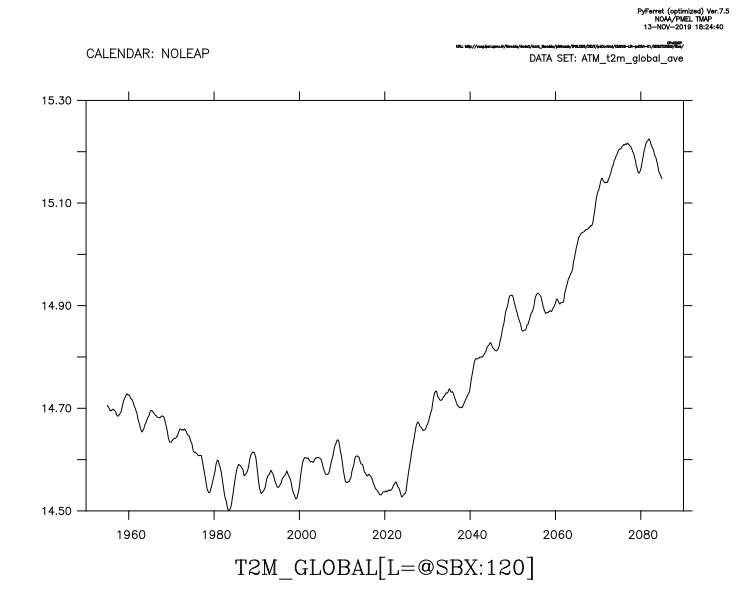

In [3]:
%%ferret

let var = T2M_GLOBAL[l=@sbx:120]
plot var

In [4]:
%ferret_getdata vardict = var
vardict

Message: vardict is now available in python as a dictionary containing the variable's metadata and data array.

{'title': 'var', 'data': array([[[[[[-1.e+34]],
 
           [[-1.e+34]],
 
           [[-1.e+34]],
 
           ...,
 
           [[-1.e+34]],
 
           [[-1.e+34]],
 
           [[-1.e+34]]]]]]), 'missing_value': array([-1.e+34]), 'data_unit': '', 'axis_types': (7,
  7,
  7,
  4,
  7,
  7), 'axis_names': ('', '', '', 'TIME_COUNTER', '', ''), 'axis_units': ('',
  '',
  '',
  'CALTYPE_NOLEAP',
  '',
  ''), 'axis_coords': (None,
  None,
  None,
  array([[  16,    1, 1950,   12,    0,    0],
         [  15,    2, 1950,    0,    0,    0],
         [  16,    3, 1950,   12,    0,    0],
         ...,
         [  16,   10, 2089,   12,    0,    0],
         [  16,   11, 2089,    0,    0,    0],
         [  16,   12, 2089,   12,    0,    0]], dtype=int32),
  None,
  None)}

### Prepare data extracted from pyferret

In [5]:
import numpy as np
import datetime

In [6]:
values = vardict['data'].squeeze()
values[values == -1E+34] = np.nan
values

array([nan, nan, nan, ..., nan, nan, nan])

In [8]:
datesNum = vardict['axis_coords'][3]
(day, month, year, hour, minute, second) = datesNum[0]
print(datesNum[0])
d = datetime.datetime(year, month, day, hour, minute, second)
d.strftime('%Y-%m-%d %H:%M:%S')

[  16    1 1950   12    0    0]


'1950-01-16 12:00:00'

In [9]:
dates = []
datesString = []
for d in datesNum:
    date = datetime.datetime(d[2], d[1], d[0], d[3], d[4], d[5])
    dates.append(date)
    datesString.append(date.strftime('%Y-%m-%d %H:%M:%S'))
dates[0:4]

[datetime.datetime(1950, 1, 16, 12, 0),
 datetime.datetime(1950, 2, 15, 0, 0),
 datetime.datetime(1950, 3, 16, 12, 0),
 datetime.datetime(1950, 4, 16, 0, 0)]

### Plot using bokeh

In [10]:
colors = ["#8c564b","#1f77b4","#2ca02c","#d62728","#9467bd","#e377c2","#7f7f7f","#bcbd22","#17bec"]

In [11]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show, save, ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool, BoxAnnotation, Span, Label
from bokeh.palettes import Set1_8, Set2_8
from bokeh.models import Range1d

bk.output_notebook()

Loading BokehJS ...

In [12]:
source = ColumnDataSource(data=dict(
        date = dates,
        dateString = datesString,
        val = values) )

hover1 = HoverTool(tooltips=[("date, value", "@dateString, @val")])
tools1 = ["pan,wheel_zoom,crosshair",hover1,"reset,save"]

plot1 = figure(plot_width=800, plot_height=500, x_axis_type="datetime", min_border=10, 
               tools=tools1, active_scroll="wheel_zoom")

plot1.axis[0].formatter = DatetimeTickFormatter(years="%Y", months="%b-%y", days="%d-%b-%y", hours="%H:%M")

plot1.line('date', 'val', source=source, line_alpha=1.0, line_join="round", line_color=colors[4], line_width=2)
#plot1.circle('date', 'val', source=source, size=3, color=colors[0])

show(plot1)